<a href="https://colab.research.google.com/github/m123m12/Telecom-Churn-Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>
1.How many customers are churned ?

2.How many customers having Voice mail plan?

3.How many customers having International plan? 

4.show the percentage of churn with a pie chart?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
telecom_data = pd.read_csv("/content/drive/MyDrive/Telecom Churn Analysis/Telecom Churn.csv")

In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
telecom_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
telecom_data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [8]:
telecom_data.shape

(3333, 20)

IDENTIFYING MISSING AND DUPLICATED VALUES

In [32]:
telecom_data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


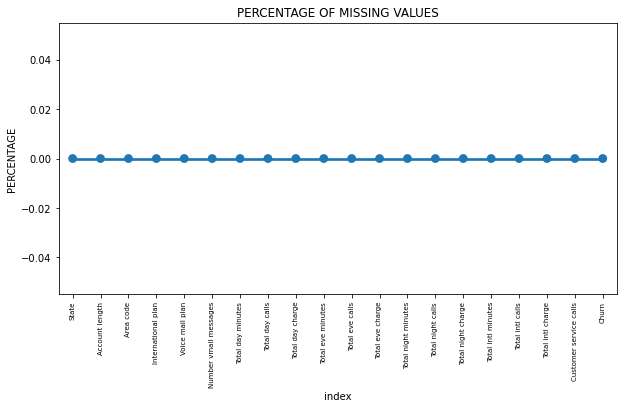

In [10]:
missing_values = pd.DataFrame((telecom_data.isnull().sum())*100/len(telecom_data)).reset_index()
plt.figure(figsize=(10,5))
ax = sns.pointplot('index',0,data=missing_values)
plt.xticks(rotation =90,fontsize =7)
plt.title("PERCENTAGE OF MISSING VALUES")
plt.ylabel("PERCENTAGE")
plt.show()

In [11]:
len(telecom_data[telecom_data.duplicated()])

0

There are no duplicated and missing values in the data set.So there is no need to clean the missing values.

In [12]:
telecom_data.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
#COLUMNS DESCRIPTION
      

STATE:
     There are 51 unique states present.

ACCOUNT LENGTH:
               It is the length that the customer used their account

AREA CODE:
          Indicates code number of area.There are 3 unique area code present

INTERNATIONAL PLAN:
                   Yes means plan taken and no means plan not taken

VOICE MAIL PLAN:
                Yes means plan taken and no means plan not taken


NUMBER OF VMAIL MESSAGES:
                         number of voice mail messages

TOTAL DAY MINUTES:
                  Total number of minutes spent in morning

TOTAL DAY CALLS:
                The number of calls in morning

TOTAL DAY CHARGE:
                Total charge to the customers in morning


TOTAL EVE MINUTES:
                 Total number of minutes spent in evening

TOTAL EVE CALLS:
                The number of calls in evening

TOTAL EVE CHARGE:
                 Total charge to the customers in evening

TOTAL NIGHT MINUTES:
                    Total number of minutes spent in night

TOTAL NIGHT CALLS:
                  The number of calls in night

TOTAL NIGHT CHARGE:
                   Total charge to the customers in night

TOTAL INTL MINUTES:
                   Total number of minutes spent in international calls

TOTAL INTL CALLS:
                 Total number of international calls

TOTAL INTL CHARGE:
                  Total charge to the international calls

CUSTOMER SERVICE CALLS:
                       Number of customer service calls

CHURN:
      Customer churn,True indicates churned customer, False indicates retained customer







      

In [ ]:
#1.How many customers are churned?

In [13]:
(telecom_data["Churn"]==True).sum()

483

483 customers are churned from network

In [14]:
(telecom_data['Churn']==False).sum()

2850

2850 customers are not churned

In [ ]:
#2.How many customers having Voice mail plan?

In [15]:
(telecom_data["Voice mail plan"]=='Yes').sum()

922

922  customers having voicemail plan.

In [16]:
(telecom_data["Voice mail plan"]=='No').sum()

2411

2411 customers do not have any voicemail plan

In [ ]:
#3.How many customers having International plan?

In [17]:
(telecom_data["International plan"]=='Yes').sum()

323

323 customers having International plan

In [18]:
(telecom_data["International plan"]=='No').sum()

3010

3010 customers do not have any international plan

In [ ]:
# 4.show the percentage of churn with a pie chart?

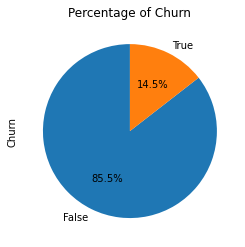

In [19]:
telecom_data["Churn"].value_counts().plot.pie(startangle=90,autopct='%1.1f%%')
plt.title('Percentage of Churn')
plt.show()

Among 3333 customers 14.5% customers are churned.

Let's see the impact of other features on Churning

*Analysing State Column

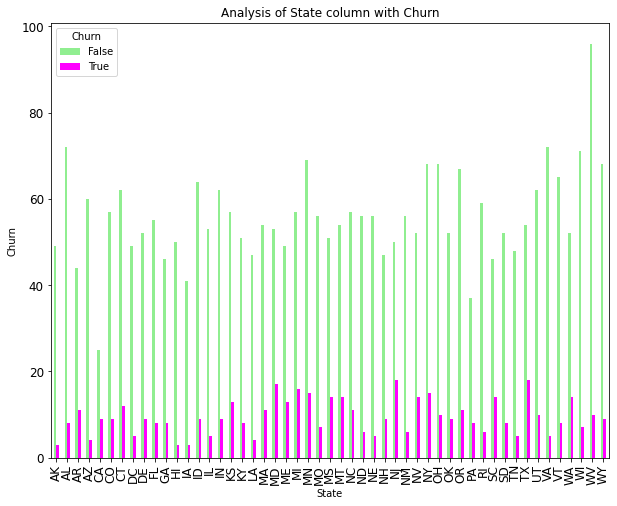

In [20]:
churned_customers = telecom_data.groupby(['State','Churn'])['Churn'].count().unstack()
churned_customers.plot(kind='bar',color = ['lightgreen','magenta'],figsize=(10,8),fontsize = 12)
plt.title('Analysis of State column with Churn')
plt.xlabel('State')
plt.ylabel('Churn')
plt.show()


In [21]:
Statedata = pd.crosstab(telecom_data["State"],telecom_data["Churn"])
Statedata['Percentage_Churn'] = Statedata.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Statedata)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

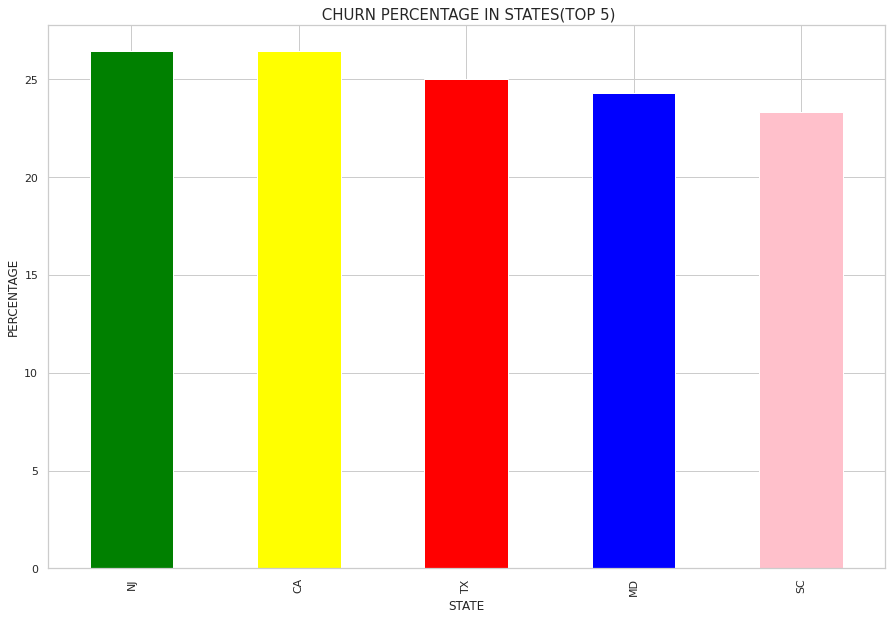

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
((telecom_data.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(5).plot.bar(color = ['green','yellow','red','blue','pink'])
plt.title(" CHURN PERCENTAGE IN STATES(TOP 5)", fontsize = 15)
plt.xlabel('STATE', fontsize = 12)
plt.ylabel('PERCENTAGE', fontsize = 12)
plt.show()

From the above analysis we conclude that NJ,CA,TX,MD,SC states have high churn rate.I think high churn rate may be due to the low coverage of the mobile network in these states.

*ANALYSING THE RELATION BETWEEN ACCOUNT LENGTH AND CHURN 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


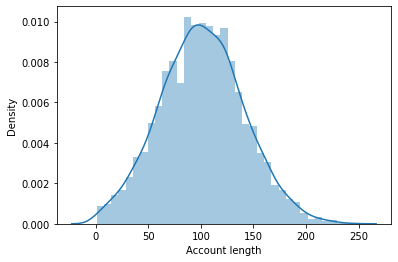

In [22]:
sns.distplot(telecom_data['Account length'])